In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
for row in session.query(Measurement, Measurement.date).order_by(Measurement.date.desc()).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x000002B4903B69B0>, '2017-08-23')
(<sqlalchemy.ext.automap.measurement object at 0x000002B4903B6A20>, '2017-08-23')
(<sqlalchemy.ext.automap.measurement object at 0x000002B4903B6A90>, '2017-08-23')
(<sqlalchemy.ext.automap.measurement object at 0x000002B4903B6B00>, '2017-08-23')
(<sqlalchemy.ext.automap.measurement object at 0x000002B4903B6B70>, '2017-08-22')


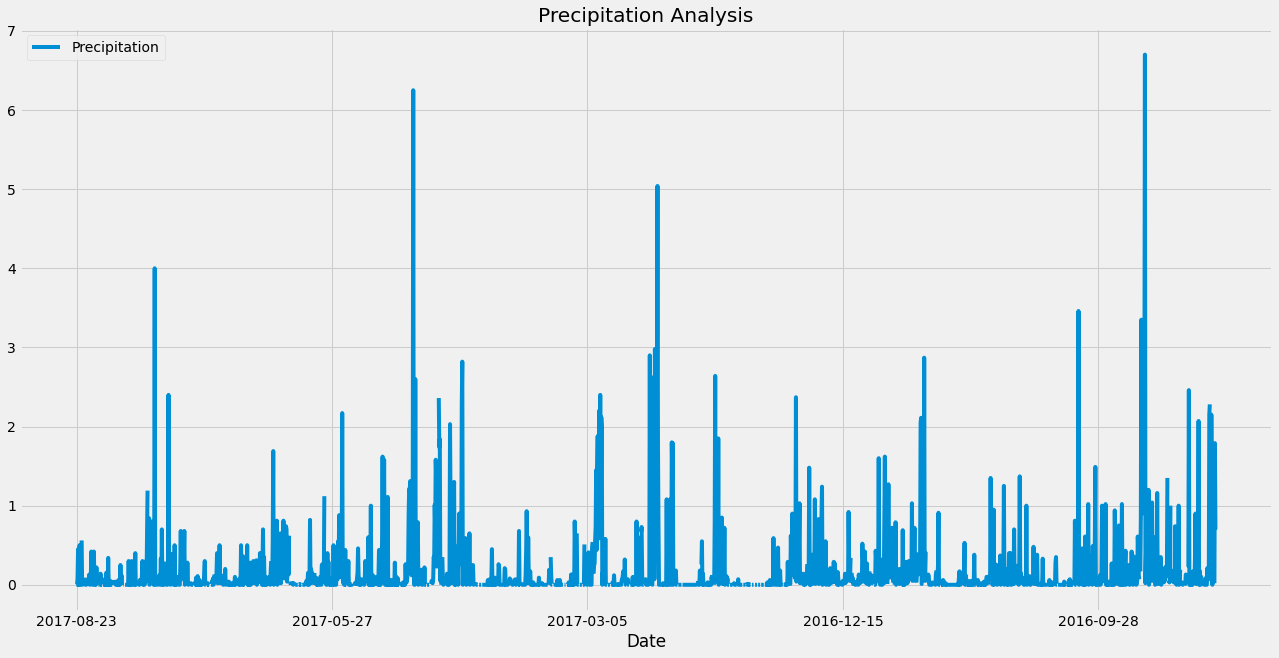

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.

prior_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

results= session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= prior_year).\
    order_by(Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_df=pd.DataFrame(results, columns=['Date','Precipitation'])
prcp_df.set_index('Date', inplace= True)
prcp_df.head()




# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(figsize=(20, 10), title="Precipitation Analysis")
plt.savefig("Images/precipitation_analysis.png")
plt.show()


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()